## Load MNIST Dataset

In [8]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

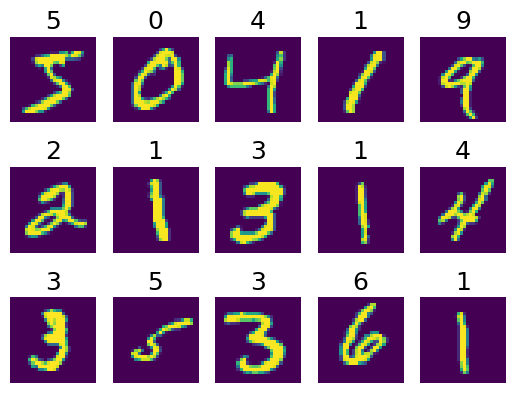

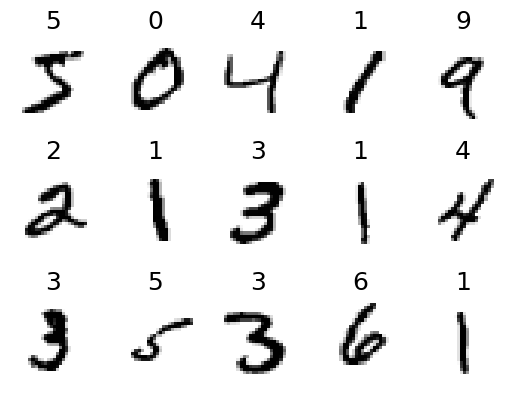

In [43]:
import matplotlib.pyplot as plt

plt.figure(1)
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(xTrain[i])
    plt.title(yTrain[i], fontsize = 18)
    plt.axis("off")
plt.figure(2)
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(xTrain[i], cmap=plt.cm.binary)
    plt.title(yTrain[i], fontsize = 18)
    plt.axis("off")

# **<center><font style="color:rgb(100,109,254)">1</font> </center>** 
## **<center><font style="color:rgb(100,109,254)">Logistic Regression</font> </center>** 
### **<center><font style="color:rgb(100,109,254)">(MNIST Dataset)</font> </center>** 

In [44]:
xTrain.shape

(60000, 28, 28)

## 1.1 Reshape the Training Dataset

In [17]:
x = xTrain.reshape(60000, -1)
x.shape

(60000, 784)

## 1.2 Import Model

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

## 1.3 Train the Model

In [18]:
model.fit(x, yTrain)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 1.4 Make Predistions

In [19]:
xTest.shape

(10000, 28, 28)

In [21]:
model.predict(xTest[0].reshape(1, -1))

array([7], dtype=uint8)

In [22]:
yTest[0]

7

In [51]:
path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\37. Examination Answer Sheet Marks Entrance Using OCR\\ML and DL Algo For Hand Written text and digits\\Dataset"

(39, 32)

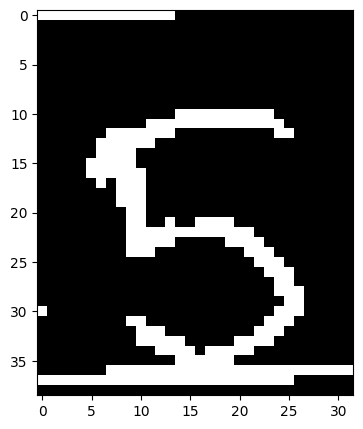

In [56]:
import cv2
import numpy as np

img = cv2.imread(path+"\\2.PNG")
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binaryImage = cv2.threshold(grayImage, 90, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(5,5))
plt.imshow(binaryImage, cmap=plt.cm.gray)
binaryImage.shape

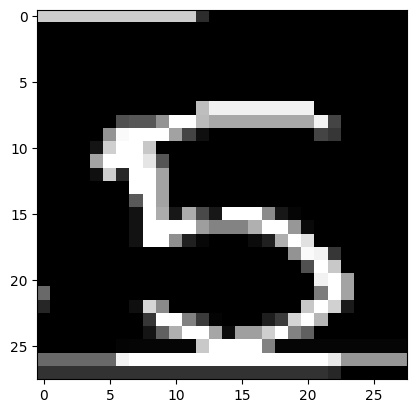

In [57]:
resizedImage = cv2.resize(binaryImage, (28,28))
flattenImage = resizedImage.flatten().reshape(1,-1)
flattenImage.shape

plt.imshow(np.reshape(flattenImage,(28,28)), cmap=plt.cm.gray)

In [58]:
model.predict(flattenImage)

array([9], dtype=uint8)

## 1.5 Accuracy Check

In [25]:
pred = model.predict(xTest.reshape(10000,-1))

In [28]:
accuracy = model.score(xTest.reshape(10000,-1), yTest)

In [29]:
accuracy

0.9255

## **<center><font style="color:rgb(10,200,0)">Accuracy = 92.55%</font> </center>** 

## 1.6 Confusion Matrix

In [45]:
import seaborn as sns
from sklearn import metrics
confusionMetrix = metrics.confusion_matrix(yTest, pred)
confusionMetrix

array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  910,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   8,    7,    6,   23,    6,   26,   10,   10,  869,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]],
      dtype=int64)

Text(0.5, 1.0, 'Accuracy: 92 %')

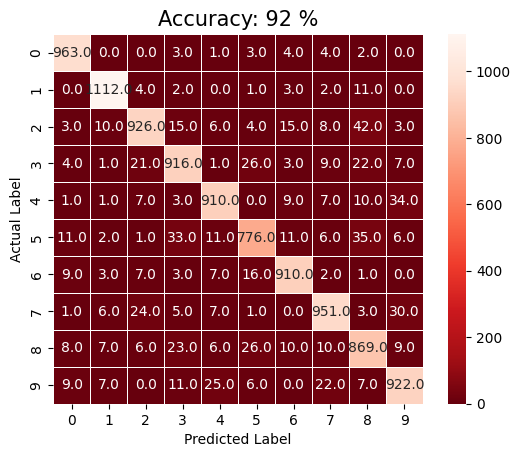

In [50]:
sns.heatmap(confusionMetrix, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Reds_r')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title(f"Accuracy: {int(accuracy * 100)} %", size = 15)

# **<center><font style="color:rgb(100,109,254)">2</font> </center>** 
## **<center><font style="color:rgb(100,109,254)">Decision Tree</font> </center>** 
### **<center><font style="color:rgb(100,109,254)">(MNIST Dataset)</font> </center>** 

## 2.1 Import Model



In [60]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy")

## 2.2 Train the Model


In [61]:
model.fit(x, yTrain)

DecisionTreeClassifier(criterion='entropy')

## 2.3 Make Predistions


In [63]:
xTest.shape

(10000, 28, 28)

In [64]:
model.predict(xTest[0].reshape(1, -1))

array([7], dtype=uint8)

In [65]:
yTest[0]

7

(39, 32)

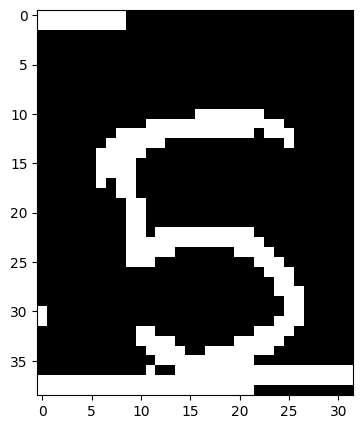

In [90]:
path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\37. Examination Answer Sheet Marks Entrance Using OCR\\ML and DL Algo For Hand Written text and digits\\Dataset"
import cv2
import numpy as np

img = cv2.imread(path+"\\2.PNG")
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binaryImage = cv2.threshold(grayImage, 75, 255, cv2.THRESH_BINARY_INV)
binaryImage = cv2.dilate(binaryImage, (21,21))
plt.figure(figsize=(5,5))
plt.imshow(binaryImage, cmap=plt.cm.gray)
binaryImage.shape


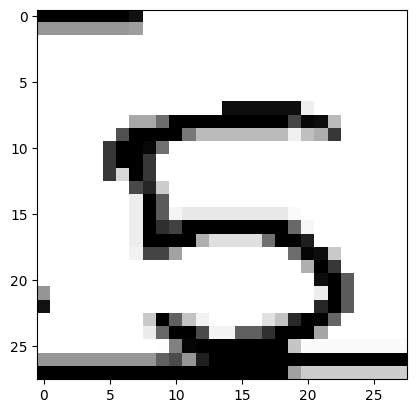

In [91]:
resizedImage = cv2.resize(binaryImage, (28,28))
flattenImage = resizedImage.flatten().reshape(1,-1)
flattenImage.shape

plt.imshow(np.reshape(flattenImage,(28,28)), cmap=plt.cm.binary)

In [92]:
model.predict(flattenImage)

array([9], dtype=uint8)

## 2.4 Accuracy Check


In [94]:
accuracy = model.score(xTest.reshape(10000,-1), yTest)
accuracy

0.8862

## **<center><font style="color:rgb(10,200,0)">Accuracy = 88.62%</font> </center>** 

## 2.5 Confusion Matrix



In [95]:
import seaborn as sns
from sklearn import metrics
confusionMetrix = metrics.confusion_matrix(yTest, pred)
confusionMetrix

array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  910,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   8,    7,    6,   23,    6,   26,   10,   10,  869,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]],
      dtype=int64)

Text(0.5, 1.0, 'Accuracy: 88 %')

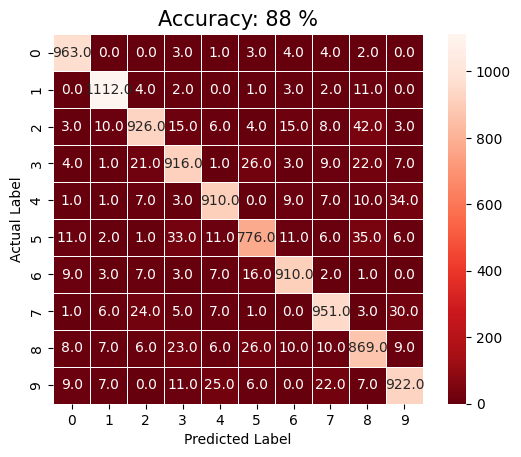

In [96]:
sns.heatmap(confusionMetrix, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Reds_r')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title(f"Accuracy: {int(accuracy * 100)} %", size = 15)